<a href="https://colab.research.google.com/github/harttu/courses/blob/main/deep_learning_with_pytorch/Chapter_6_applying_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 - Applying nn on t_c and t_u

In [37]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## Luodaan oma malli

In [38]:
def malli(x,malli_etu_w,malli_etu_b,malli_taka_w,malli_taka_b):
  vali = torch.tanh(x * malli_etu_w + malli_etu_b)
  output = torch.matmul(vali,malli_taka_w) + malli_taka_b
  return(output)

In [63]:
# kaksi lämpömittaria
# toisesta saadaan arvo, ja haluttaisiin sen avulla tietää mitä toisessa on
gold = torch.tensor([ [-4.0], [0.5], [3.0], [6.0], [8.0], [11.0], [13.0], [14.0], [21.0], [28.0] ]) # celcius-mittari
x = torch.tensor([ [21.8], [35.7], [33.9], [48.4], [48.9], [56.3], [60.4], [58.2], [68.4], [81.9]]) # Farhenheit

gold = gold#t_c#.unsqueeze(1)
x = 0.1 * x#t_u#.unsqueeze(1)

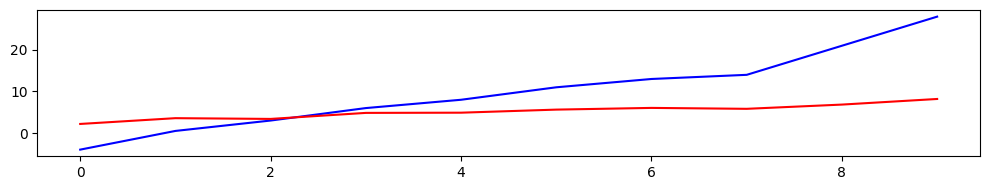

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))

axes.plot(range(0,10), gold.detach().numpy(), color='blue', label='Line 1')
axes.plot(range(0,10), x.detach().numpy(), color='red', label='Line 2')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Esimerkki tensorien laskutoimituksista

In [65]:
malli_etu_w = torch.tensor([0.4 , 0.1], requires_grad = True)
malli_etu_b = torch.tensor([0.2] , requires_grad = True)

x_esim = torch.tensor([[1],[2],[3]])

vali = torch.tanh(x_esim * malli_etu_w + malli_etu_b)
#vali,vali.shape

malli_taka_w = torch.tensor([ [ 0.2 ] , [ 0.8 ] ], requires_grad = True)
malli_taka_b = torch.tensor([0.15], requires_grad = True)

#vali, malli_taka_w, vali.shape, malli_taka_w.shape#, vali * malli_taka_w
output = torch.matmul(vali,malli_taka_w) + malli_taka_b
output

tensor([[0.4905],
        [0.6063],
        [0.6968]], grad_fn=<AddBackward0>)

i: 1 - loss: 90.75997161865234 
i: 100 - loss: 24.383533477783203 
i: 200 - loss: 19.538429260253906 
i: 300 - loss: 15.22276782989502 
i: 400 - loss: 11.681200981140137 
i: 500 - loss: 7.874270439147949 
i: 600 - loss: 3.945157289505005 
i: 700 - loss: 2.161421537399292 
i: 800 - loss: 1.4936062097549438 
i: 900 - loss: 1.1186186075210571 
i: 1000 - loss: 0.9313950538635254 


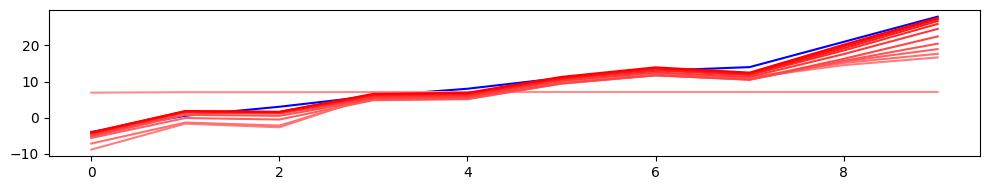

In [66]:
loss_f = torch.nn.MSELoss()
#optimizer  = torch.optim.SGD(seq_model.parameters(), lr=0.01)
epochs = 1000
losses = []
lr = 0.005

dimensiot = 11

malli_etu_w = torch.rand((1,dimensiot), requires_grad = True)
malli_etu_b = torch.rand((1,1), requires_grad = True)
malli_taka_w = torch.rand((dimensiot,1), requires_grad = True)
malli_taka_b = torch.rand((1,1), requires_grad = True)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))
axes.plot(range(0,10), gold.detach().numpy(), color='blue', label='Line 1')

# Alku- ja loppupisteet
pink = np.array([1, 0.6, 0.6])
red = np.array([1, 0, 0])

# Luo liukuma
colors = np.array([pink + i/11 * (red - pink) for i in range(12)])
y=0

for i in range(1,epochs  + 1):
  preds = malli(x,malli_etu_w,malli_etu_b,malli_taka_w,malli_taka_b)

  loss = loss_f(preds,gold)

  if malli_etu_w.grad is not None:
    malli_etu_w.grad.zero_()
  if malli_etu_b.grad is not None:
    malli_etu_b.grad.zero_()
  if malli_taka_w.grad is not None:
    malli_taka_w.grad.zero_()
  if malli_taka_b.grad is not None:
    malli_taka_b.grad.zero_()

  loss.backward()
  #optimizer.step()
  with torch.no_grad():
    malli_etu_w -= malli_etu_w.grad * lr#.step()#.zero_grad()
    malli_etu_b -= malli_etu_b.grad * lr#.step()#.zero_grad()
    malli_taka_w -= malli_taka_w.grad * lr#.step()#.zero_grad()
    malli_taka_b -= malli_taka_b.grad * lr#.step()#.zero_grad()

  #losses.append(loss.detach().numpy())
  if i == 1 or i % (epochs / 10) == 0:
    y = y + 1
    axes.plot(range(0,10), preds.detach().numpy(), color=colors[y], label='Line 2'+str(y))
    print(f"i: {i} - loss: {loss.item()} ")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

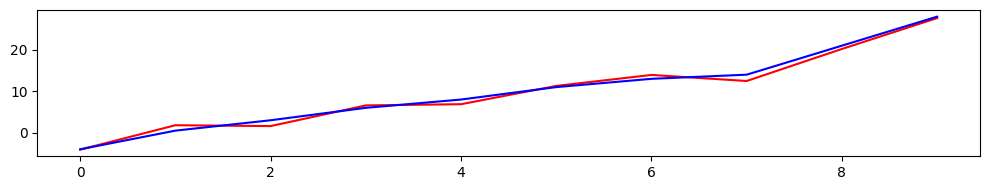

In [67]:
fig, axes = plt.subplots(nrows=1, ncols = 1, figsize=(10,2))

axes.plot(range(0,10), preds.detach().numpy(), color="red", label="Malli")
axes.plot(range(0,10), gold.detach().numpy(), color='blue', label='Line 1')

plt.tight_layout()
plt.show()

In [68]:
from collections import OrderedDict

seq_model = nn.Sequential(
    OrderedDict(
    [
      ('hidden_linear', nn.Linear(1,8)),
      ('hidden_activation', nn.Tanh()),
      ('output_linear', nn.Linear(8,1))
    ] )
    )

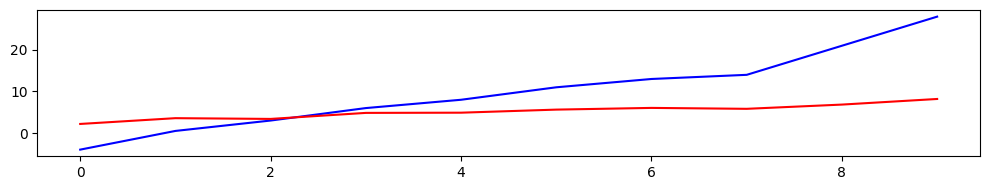

In [69]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))

axes.plot(range(0,10), gold.detach().numpy(), color='blue', label='Line 1')
axes.plot(range(0,10), x.detach().numpy(), color='red', label='Line 2')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [70]:
seq_model = nn.Sequential(
    nn.Linear(1,13),
    nn.Tanh(),
    nn.Linear(13,1))

loss_f = torch.nn.MSELoss()
optimizer  = torch.optim.SGD(seq_model.parameters(), lr=0.01)
epochs = 5000
losses = []

for i in range(1,epochs  + 1):
  preds = seq_model(x)
  loss = loss_f(preds,gold)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #losses.append(loss.detach().numpy())
  if i == 1 or i % (epochs / 10) == 0:
    print(f"i: {i} - loss: {loss.item()} ")

i: 1 - loss: 178.20291137695312 
i: 500 - loss: 39.47871017456055 
i: 1000 - loss: 4.372028827667236 
i: 1500 - loss: 2.619494915008545 
i: 2000 - loss: 1.6172130107879639 
i: 2500 - loss: 1.2538495063781738 
i: 3000 - loss: 1.154520869255066 
i: 3500 - loss: 1.0998612642288208 
i: 4000 - loss: 1.0631169080734253 
i: 4500 - loss: 1.0355939865112305 
i: 5000 - loss: 1.0135791301727295 


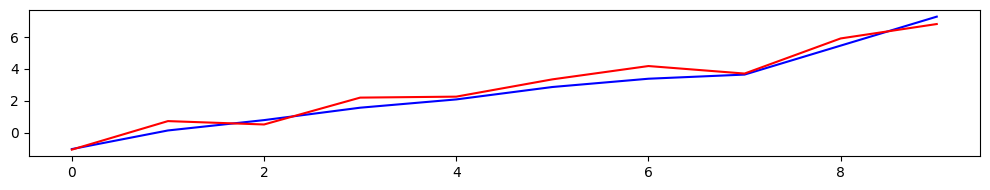

In [40]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))

axes.plot(range(0,10), gold.detach().numpy(), color='blue', label='Line 1')
axes.plot(range(0,10), seq_model(x).detach().numpy(), color='red', label='Line 2')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [41]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
    t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)               # The model is now
        loss_train = loss_fn(t_p_train, t_c_train) # passed in, instead of
        t_p_val = model(t_u_val)                   # the individual params.
        loss_val = loss_fn(t_p_val, t_c_val)
        optimizer.zero_grad()
        loss_train.backward() # The loss function is also passed
        optimizer.step()      # in. We’ll use it in a moment.

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                f" Validation loss {loss_val.item():.4f}")

In [42]:
t_c = [ 0.5, 14.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0 ]
t_u = [35.7, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4 ]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [20]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

In [21]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([6, 3, 2, 5, 7, 4, 9, 8]), tensor([0, 1]))

In [22]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [23]:
optimizer = torch.optim.SGD(seq_model.parameters(), lr=1e-3) # We’ve dropped the
                                                    # learning rate a bit to
                                                    # help with stability.
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

RuntimeError: ignored

In [ ]:
n_epochs = 5000
loss_fn = nn.MSELoss()
for epoch in range(1, n_epochs + 1):
    t_p_train = seq_model(x)               # The model is now
    loss_train = loss_fn(t_p_train, gold) # passed in, instead of
    #t_p_val = seq_model(t_u_val)                   # the individual params.
    #loss_val = nn.MSELoss((t_p_val, t_c_val)
    optimizer.zero_grad()
    loss_train.backward() # The loss function is also passed
    optimizer.step()      # in. We’ll use it in a moment.

    if epoch == 1 or epoch % 1000 == 0:
        print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},")
    #        f" Validation loss {loss_val.item():.4f}")

Epoch 1, Training loss 553.6083,
Epoch 1000, Training loss 77.1356,
Epoch 2000, Training loss 77.1583,
Epoch 3000, Training loss 77.1363,
Epoch 4000, Training loss 77.1321,
Epoch 5000, Training loss 77.1368,


In [ ]:
for name, param in seq_model.named_parameters():
  print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [ ]:
next(seq_model.parameters())

Parameter containing:
tensor([[ 0.2089],
        [-0.3099],
        [ 0.7161],
        [-0.2921],
        [ 0.5683],
        [-0.2310],
        [-0.8640],
        [-0.7190],
        [ 0.4549],
        [ 2.8549],
        [-0.8763],
        [-0.8471],
        [ 0.8698]], requires_grad=True)

ValueError: ignored

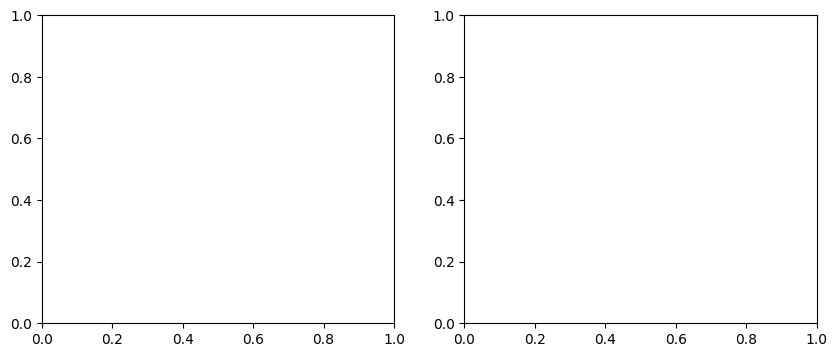

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the lines on the first subplot (axes[0])
axes[0].plot(range(0,epochs+1), losses, linewidth=2.0)
axes[0].set_title('Loss')
axes[0].legend()

# Plot the lines on the second subplot (axes[1])
axes[1].plot(range(0,len(t_c)), t_c, color='blue', label='Line 1')
axes[1].plot(range(0,len(t_c)), seq_model(t_u).detach().numpy(), color='red', label='Line 2')

axes[1].set_title('Gold vs. Model')
axes[1].legend()

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
def training_loop(n_epochs,
                  optimizer,
                  model,
                  loss_fn,
                  t_u_train,
                  #t_u_val,
                  t_c_train,
                  #t_c_val
                  ):
  for epoch in range(1,n_epochs + 1):
    t_p_train = model(t_u_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    #t_p_val = model(t_u_val)
    #loss_val = loss_fn(t_p_val, t_c_val)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch == 1 or epoch % 1000 == 0:
      print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},")
      #      f" Validation loss {loss_val.item():.4f}")

In [ ]:
training_loop(1000,
              optimizer,
              seq_model,
              loss_f,
              t_u,
              #t_u,
              #t_c,
              t_c)

Epoch 1, Training loss 194.9488,
Epoch 1000, Training loss 194.9488,


In [ ]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = seq_model,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

In [ ]:
X.shape, x.shape

(torch.Size([100, 1]), torch.Size([10, 1]))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Create a simple dataset with 100 samples and 1 feature
X = torch.randn(100, 1)
y = 3 * X + 2 + torch.randn(100, 1) * 0.1

#X = x
#y = gold

# Define a simple neural network using nn.Sequential
model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13,1)
)

# Set the learning rate, number of epochs, loss function, and optimizer
learning_rate = 0.01
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass: compute the prediction
    y_pred = model(X)

    # Compute the loss
    loss = criterion(y_pred, y)

    # Zero the gradients before computing them again
    optimizer.zero_grad()

    # Compute gradients
    loss.backward()

    # Update the parameters using the optimizer
    optimizer.step()

    # Print the loss for every 10th epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Print the updated parameters
print("Updated parameters: ")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")


Epoch 0, Loss: 8.940764427185059
Epoch 10, Loss: 2.80075740814209
Epoch 20, Loss: 1.0816895961761475
Epoch 30, Loss: 0.5985932350158691
Epoch 40, Loss: 0.4406448304653168
Epoch 50, Loss: 0.3771175146102905
Epoch 60, Loss: 0.34551799297332764
Epoch 70, Loss: 0.3258507251739502
Epoch 80, Loss: 0.3109458088874817
Epoch 90, Loss: 0.2981247007846832
Updated parameters: 
0.weight: tensor([[ 0.9776],
        [-0.2260],
        [ 0.8976],
        [-0.6575],
        [ 0.4481],
        [-0.4113],
        [ 0.9567],
        [-0.4909],
        [ 0.8123],
        [ 0.9516],
        [ 0.2139],
        [ 0.3622],
        [ 0.3165]])
0.bias: tensor([-0.1411,  0.2002,  0.7015,  0.5266,  0.8576, -0.1154, -0.1481, -0.1294,
         0.5786, -0.1604,  0.4251,  0.5983,  0.6296])
2.weight: tensor([[ 0.7261, -0.0656,  0.8435, -0.4586,  0.5097, -0.4752,  0.5388, -0.3900,
          0.8212,  0.7330,  0.2783,  0.2986,  0.5271]])
2.bias: tensor([0.7188])


In [ ]:
model = nn.Sequential(
    nn.Linear(1,13),
    nn.Tanh(),
    nn.Linear(13,1))

loss_f = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5000
losses = []

for i in range(1,epochs  + 1):
  preds = model(x)
  loss = loss_f(preds,gold)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #losses.append(loss.detach().numpy())
  if i == 1 or i % (epochs / 10) == 0:
    print(f"i: {i} - loss: {loss} ")

i: 1 - loss: 178.20497131347656 
i: 500 - loss: 82.62242126464844 
i: 1000 - loss: 82.62229919433594 
i: 1500 - loss: 82.62248229980469 
i: 2000 - loss: 82.62247467041016 
i: 2500 - loss: 82.62247467041016 
i: 3000 - loss: 82.6224594116211 
i: 3500 - loss: 82.62245178222656 
i: 4000 - loss: 82.62242126464844 
i: 4500 - loss: 82.62220764160156 
i: 5000 - loss: 82.62256622314453 


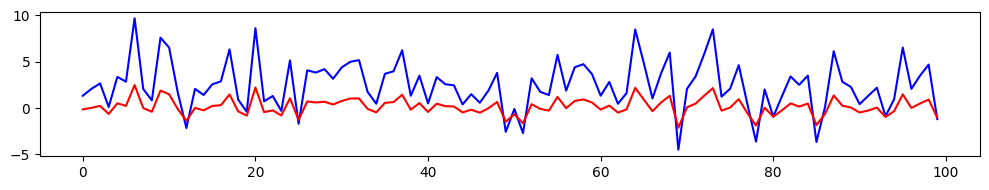

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))

axes.plot(range(0,100), y.detach().numpy(), color='blue', label='Line 1')
axes.plot(range(0,100), X.detach().numpy(), color='red', label='Line 2')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

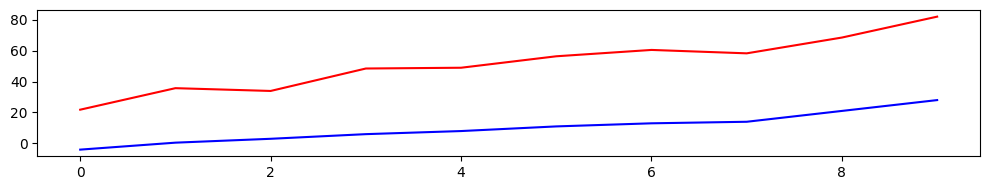

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))

axes.plot(range(0,10), gold.detach().numpy(), color='blue', label='Line 1')
axes.plot(range(0,10), x.detach().numpy(), color='red', label='Line 2')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
gold = torch.tensor([ [-4.0], [0.5], [3.0], [6.0], [8.0], [11.0], [13.0], [14.0], [21.0], [28.0] ])
x = torch.tensor([ [21.8], [35.7], [33.9], [48.4], [48.9], [56.3], [60.4], [58.2], [68.4], [81.9]])

In [ ]:


import torch
import torch.nn as nn
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)
t_u.shape



torch.Size([11, 1])

In [ ]:
gold.shape

torch.Size([10, 1])

In [ ]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [ ]:
linear_model = nn.Linear(1, 1) # This is just a redefinition from earlier.
optimizer = torch.optim.SGD(
    linear_model.parameters(), # This method call replaces [params].
    lr=1e-2)

In [ ]:
linear_model.parameters()


<generator object Module.parameters at 0x7f0bc215e9e0>

In [ ]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.3216]], requires_grad=True),
 Parameter containing:
 tensor([0.9431], requires_grad=True)]

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
    t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)               # The model is now
        loss_train = loss_fn(t_p_train, t_c_train) # passed in, instead of
        t_p_val = model(t_u_val)                   # the individual params.

        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward() # The loss function is also passed
        optimizer.step()      # in. We’ll use it in a moment.

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                f" Validation loss {loss_val.item():.4f}")

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = torch.optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 95.3755, Validation loss 30.8876
Epoch 1000, Training loss 3.4291, Validation loss 4.0930
Epoch 2000, Training loss 2.8639, Validation loss 3.9761
Epoch 3000, Training loss 2.8541, Validation loss 3.9680

Parameter containing:
tensor([[5.4239]], requires_grad=True)
Parameter containing:
tensor([-17.2484], requires_grad=True)


In [ ]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # We chose 13 arbitrarily. We wanted a number
                              # that was a different size from the other
                              # tensor shapes we have floating around.
            nn.Tanh(),
            nn.Linear(13, 1)) # This 13 must match the first size, however.
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [ ]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [ ]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.1209], requires_grad=True)

In [1]:
optimizer = torch.optim.SGD(seq_model.parameters(), lr=1e-3) # We’ve dropped the
                                                    # learning rate a bit to
                                                    # help with stability.
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

NameError: ignored